In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plot_utils import grid_plot

import numpy as np

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


c:\Users\Ole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

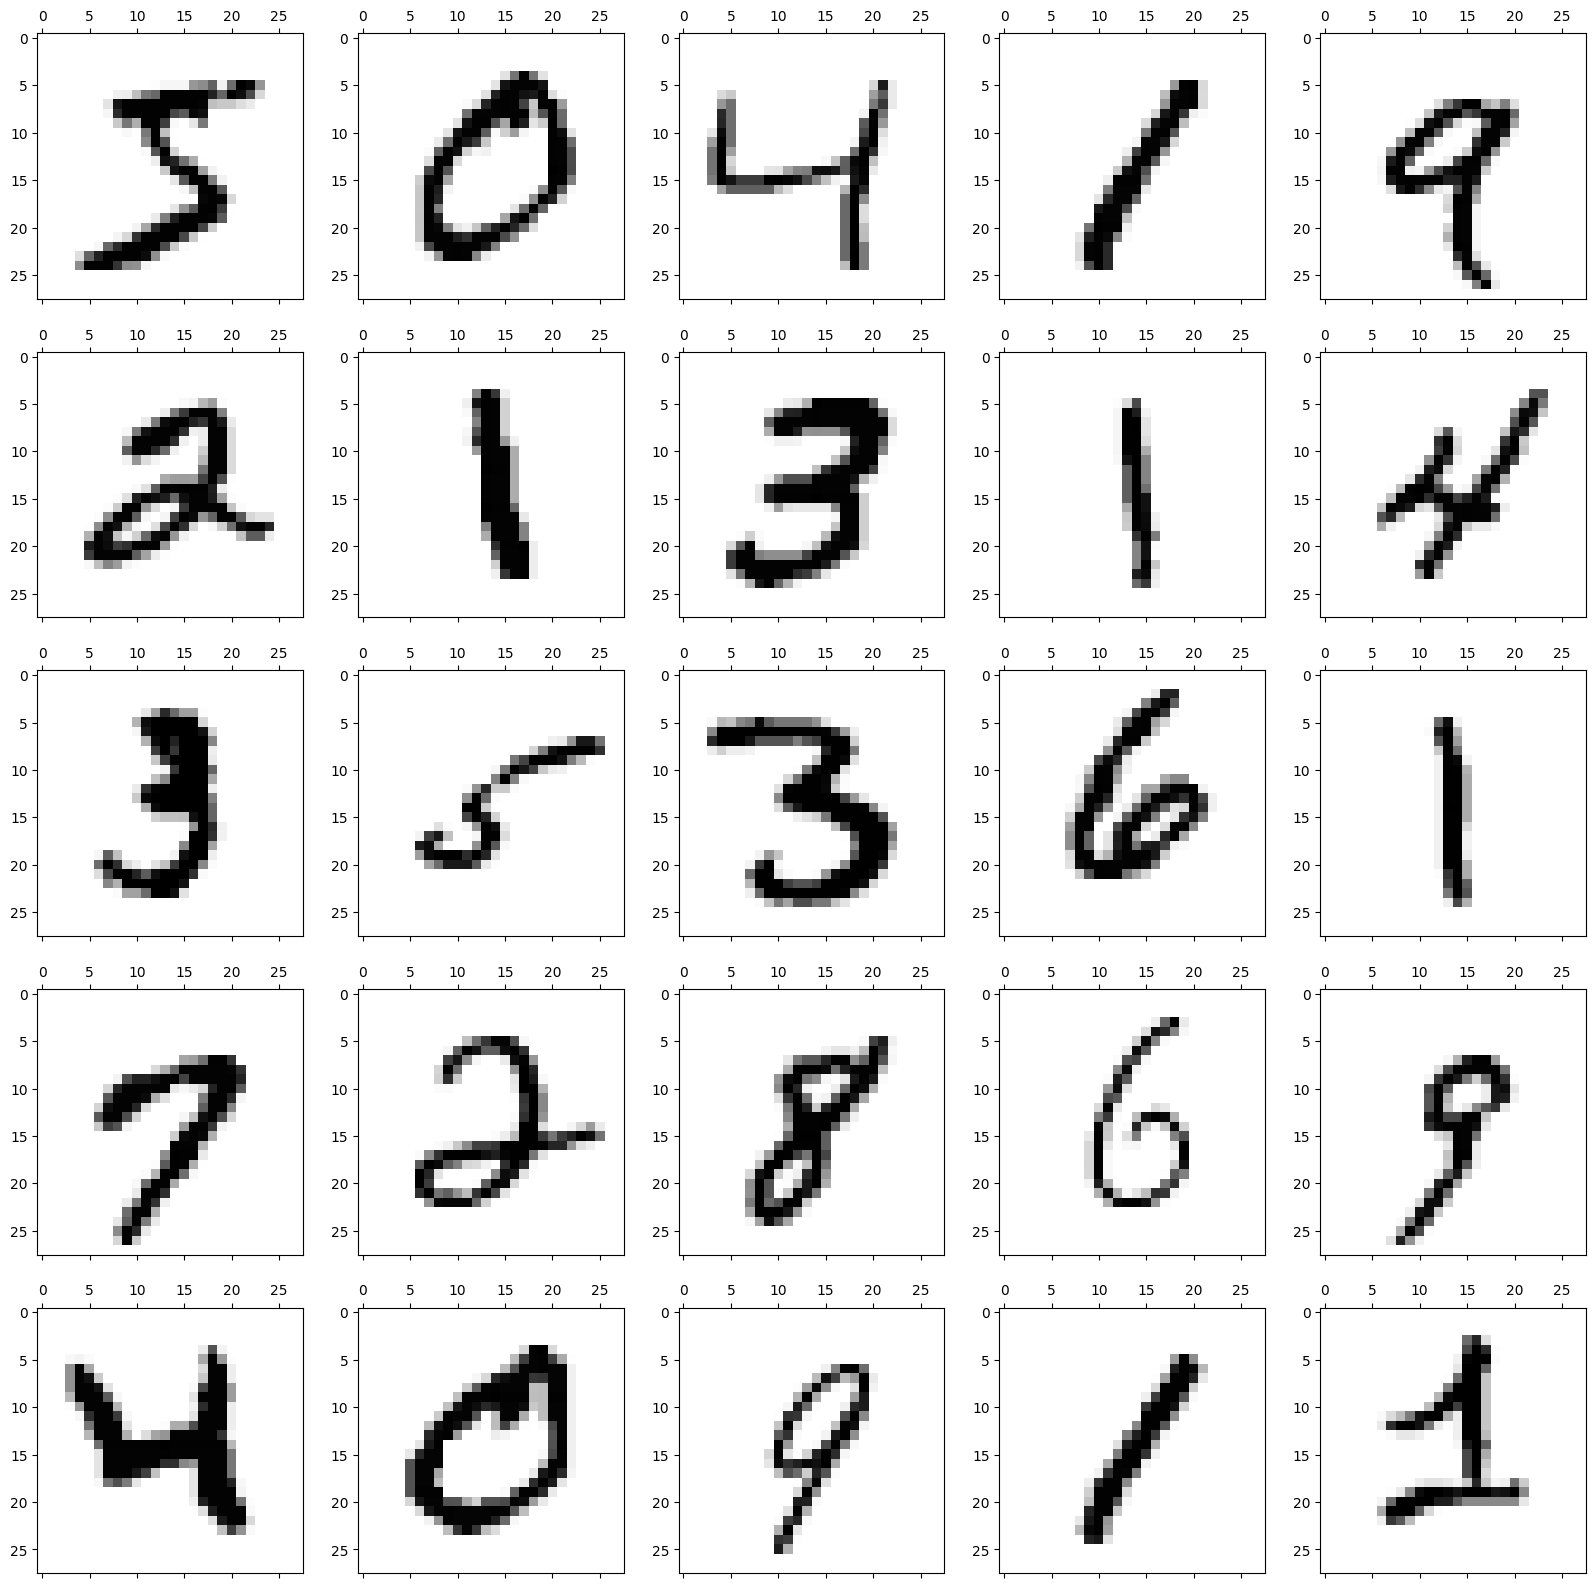

In [4]:
def plot_pc(ax, num, index):
    num_grid = num.reshape(28, -1)

    ax.matshow(num_grid, cmap='Greys')

grid_plot(X_train[0:5*5], 5, 5, plot_pc)

In [5]:

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=504, max_depth=12)

tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.9491166666666667, 0.8772)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=504, n_jobs=16)
rcf.fit(X_train, y_train)
rcf.score( X_train, y_train), rcf.score(X_test, y_test)

(0.9868666666666667, 0.9605)

In [8]:
importances = zip(range(len(X_train[0])), tree_clf.feature_importances_) #pairs up feature names with performance score
sorted(importances, key=lambda p: -p[1])[:10]

[(489, 0.058891630842946394),
 (435, 0.052621691934119946),
 (568, 0.04857364075702864),
 (350, 0.048218895224815546),
 (430, 0.04211992268966488),
 (211, 0.03453404232703753),
 (346, 0.029343336285538656),
 (234, 0.025237089594893975),
 (405, 0.02517767553728819),
 (156, 0.021759994976723977)]

In [9]:
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=504, n_jobs=16)
rcf.fit(X_train, y_train)
rcf.score( X_train, y_train), rcf.score(X_test, y_test)

(0.9868666666666667, 0.9605)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score( X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.9691)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=504)

lr.fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test)

c:\Users\Ole\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9339166666666666, 0.9255)